In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
dfc = pd.read_csv('dataSets\\Coursera_courses.csv')

In [8]:
dfr = pd.read_csv('dataSets\\Coursera_reviews.csv')

In [9]:
dfe = pd.read_csv('datasets\\edx_courses.csv')

In [10]:
dfu = pd.read_csv('datasets\\udemy_courses.csv')

In [11]:
dfck = pd.read_csv('dataSets\\coursera_data_kaggle.csv')

In [7]:
# devuelve el porcentaje de nulos en cada columna del data frame
def get_nan_in_df(data_frame):
    # count all null values in each column, sort them by the amount of null values.
    nanValues = data_frame.isna().sum().sort_values(ascending=False)
    # get the percentage of those values
    nanValuesPrct = (nanValues/len(data_frame) )*100
    
    return nanValuesPrct

In [8]:
# devuelve una lista de valores duplicados dentro de una misma columna
def get_dup_values_in_column(data_frame, column):
     
    if column in data_frame.columns:
        len_column = len(data_frame[column])
        uniques = data_frame[column].unique
        if len_column != uniques:
            df_dups = data_frame[data_frame[column].duplicated()]
            dup_values = df_dups[column].tolist()
        
        return dup_values
    else:
        return f'Esta columna no se encuentra en el data frame'

In [9]:
# Normalizar columnas de texto en data frame, 
def normalize_text_type_columns(nombre_funcion, string):
    
    string = string.strip()
    
    if nombre_funcion == 'title':
        string = string.title()
    elif nombre_funcion == 'lower':
        string = string.lower()
    elif nombre_funcion == 'upper':
        string = string.upper()
    else:
        return f'la función solo acepta uno de los siguientes parámetros: title lower upper' 
    
    return string

In [10]:
# void
def normalize_df_text_columns(data_frame, nombre_funcion):
    if (nombre_funcion != 'lower')  & (nombre_funcion != 'title') & (nombre_funcion != 'upper'):
        print(f'la función solo acepta uno de los siguientes parámetros: title lower upper')
    else:    
        for columna in data_frame.columns:
            if data_frame[columna].dtype == 'object':
                data_frame[columna] = data_frame[columna].apply(lambda x: normalize_text_type_columns(nombre_funcion, x))

# Exploración y transformación de los datos

__Vamos a comenzar tratando dos datasets de Cousera__

In [24]:
dfu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [12]:
#buscamos nulos en el data frame
get_nan_in_df(dfc)

name           0.0
institution    0.0
course_url     0.0
course_id      0.0
dtype: float64

In [13]:
dfck.head()

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


In [14]:
dfck.drop(columns = 'Unnamed: 0', inplace = True)

In [15]:
#buscamos nulos en el data frame
get_nan_in_df(dfck)

course_title                0.0
course_organization         0.0
course_Certificate_type     0.0
course_rating               0.0
course_difficulty           0.0
course_students_enrolled    0.0
dtype: float64

__Niguno de estos data frames de coursera presenta nulos__

### Antes de unir estos data frames tenemos que asegurarnos de que no tengan filas duplicadas.

In [16]:
dfc[dfc.duplicated()]

,name,institution,course_url,course_id


In [17]:
dfck[dfck.duplicated()]

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled


### Ahora revisemos los valores que debieran ser únicos

__columnas con los nombres de los cursos__

In [18]:
get_dup_values_in_column(dfc, 'name')

['Introduction to Psychology']

In [19]:
dfc[dfc.name == 'Developing Your Musicianship']

,name,institution,course_url,course_id
559,Developing Your Musicianship,Berklee College of Music,https://www.coursera.org/learn/develop-your-mu...,develop-your-musicianship


In [20]:
list_dups = get_dup_values_in_column(dfck, 'course_title')
list_dups

['Developing Your Musicianship', 'Machine Learning', 'Marketing Digital']

__Los dos valores de la primera lista van a pasar al merge, por estar en el primer data frame. Mientras que los valores de la segunda lista podrían pasar al data frame resultante del merge. Como son pocos casos preferimos resolverlo luego de la combinación.__

### Normalizar las columnas de texto en ambos data frames

In [21]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         623 non-null    object
 1   institution  623 non-null    object
 2   course_url   623 non-null    object
 3   course_id    623 non-null    object
dtypes: object(4)
memory usage: 19.6+ KB


In [22]:
for columna in dfc.columns:
    if dfc[columna].dtype == 'object':
        dfc[columna] = dfc[columna].apply(lambda x: normalize_text_type_columns('lower', x))

In [23]:
normalize_df_text_columns(dfc,'lower')

In [24]:
normalize_df_text_columns(dfck,'lower')

### Merge

In [25]:
dfck.rename(columns = {'course_title': 'name', 'course_organization': 'institution'}, inplace = True)

In [26]:
dfc = pd.merge(dfc, dfck, on=['name', "institution"], how='left')

In [27]:
# buscamos nombres duplicados
dups = get_dup_values_in_column(dfc, 'name')
dups

['introduction to psychology', 'developing your musicianship']

In [28]:
dfdups= dfc[dfc['name'] =='developing your musicianship' ]
dfdups

,name,institution,course_url,course_id,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
559,developing your musicianship,berklee college of music,https://www.coursera.org/learn/develop-your-mu...,develop-your-musicianship,course,4.8,mixed,41k
560,developing your musicianship,berklee college of music,https://www.coursera.org/learn/develop-your-mu...,develop-your-musicianship,specialization,4.8,beginner,54k


In [29]:
dfc.at[559, 'institution'] == dfc.at[560, 'institution'] 

True

In [30]:
dfc.at[560,'course_url'] == dfc.at[559,'course_url']

True

__Luego de revisar la página web, comprobamos que "Developing Your Musicianship" es el nombre tanto del curso como el nombre del programa del cual el primero forma parte, además no existe una página aparte de la especialización, solo es la del primer curso. Por lo tanto, vamos a dejar ambos resultados.__

In [31]:
dfc.iloc[559:561]

,name,institution,course_url,course_id,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
559,developing your musicianship,berklee college of music,https://www.coursera.org/learn/develop-your-mu...,develop-your-musicianship,course,4.8,mixed,41k
560,developing your musicianship,berklee college of music,https://www.coursera.org/learn/develop-your-mu...,develop-your-musicianship,specialization,4.8,beginner,54k


In [32]:
get_nan_in_df(dfc)

course_Certificate_type     27.403846
course_rating               27.403846
course_difficulty           27.403846
course_students_enrolled    27.403846
name                         0.000000
institution                  0.000000
course_url                   0.000000
course_id                    0.000000
dtype: float64

In [33]:
dfcNan = dfc[dfc.course_rating.isna()]

In [34]:
dfck[dfck.name == 'the fundamentals of hotel distribution']

,name,institution,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled


#### Acá termina el trabajo con los dos primeros sets de coursera, hora de incorporar el de reviews

## Reordenamiento de datos de Coursera

In [35]:
get_nan_in_df(dfr)

reviews         0.009624
reviewers       0.000000
date_reviews    0.000000
rating          0.000000
course_id       0.000000
dtype: float64

In [36]:
#dfr.head()

In [37]:
dfr['date_reviews'] = pd.to_datetime(dfr['date_reviews'])

In [38]:
# elimar columnas
dfr.drop(columns = ['reviews', 'reviewers'], inplace = True)

Ahora pasemos a conseguir la media de los MOOCS para llevar esos datos al otro dataset

In [39]:
# agrupamos los datos del dataframe de los reviews, por curso.
course_group = dfr.groupby('course_id')

In [40]:
# obtenemos la mieda de los ratings para cada grupo y los redondeamos 
rating_mean = course_group['rating'].mean().apply(lambda x: round(x, 1))

In [41]:
# reseteamos el índice
rating_mean = rating_mean.reset_index()

In [42]:
#rating_mean.iloc[0:50]

### Unimos los dos dataframes, el de cursos de coursera, con el de los ratings provenientes del data frame de reviews.__

In [43]:
# utilizamos el método merge con 'outer' como parámetro, para realizar una unión y no perder registros. 
dfc = pd.merge(dfc, rating_mean, how='outer')

In [44]:
#dfc

#### __Hagamos algo similar para las fechas de los reviews, esta vez no elegiremos una media del grupo, sino la fecha del comentario más antigüo, dentro de aquel.__

__Normalizamos la columna 'course_difficulty' y le cambiamos el nombre__

In [45]:
dfc.rename(columns = {'course_difficulty':'level'}, inplace=True)

In [46]:
# rellenemos los nan
dfc.level = dfc.level.fillna('-')     

In [47]:
dfc.level= dfc.level.apply(lambda x: x.replace('advanced','expert'))

In [48]:
dfc.level.isna().sum()

0

In [49]:
dfc.level.value_counts()

beginner        223
-               171
mixed           145
intermediate     76
expert            9
Name: level, dtype: int64

In [50]:
dfe.Level.value_counts()

Introductory    621
Intermediate    267
Advanced         87
Name: Level, dtype: int64

In [51]:
dfr.head()

,date_reviews,rating,course_id
0,2020-02-12,4,google-cbrs-cpi-training
1,2020-09-28,4,google-cbrs-cpi-training
2,2020-04-08,4,google-cbrs-cpi-training
3,2020-02-24,4,google-cbrs-cpi-training
4,2020-06-18,4,google-cbrs-cpi-training


__Ya contamos con el dataframe agrupado por cursos. Ahora calculemos el mínimo de cada grupo, esa es la fecha que buscamos.__

In [52]:
earliest_date = course_group['date_reviews'].min()

In [53]:
dfgrpdate = earliest_date.to_frame().reset_index().rename(columns={'date_reviews':'first_review_on'})

In [54]:
#dfgrpdate

In [55]:
# # Podemos hacer doble check de los resultados
# dfr2 = dfr[dfr['course_id']== 'writing-editing-words']
# dfr2.date_reviews.sort_values(ascending = True)

### Volvamos a unir data frames

In [56]:
dfc = pd.merge(dfc, dfgrpdate, how='left')

In [57]:
get_nan_in_df(dfc)

course_Certificate_type     27.403846
course_rating               27.403846
course_students_enrolled    27.403846
rating                       3.044872
first_review_on              3.044872
name                         0.000000
institution                  0.000000
course_url                   0.000000
course_id                    0.000000
level                        0.000000
dtype: float64

In [58]:
#dfc.head()

__Cambiamos de nombre a las columnas__

In [59]:
dfc.rename(columns={'course_students_enrolled': 'students', 'course_url':'url', 'course_Certificate_type': 'cert_type'}, inplace = True)

__Modifiquemos los valores en 'students' para que sean numéricos__

In [60]:
def normalize_weird_number(num_letra):
    numero = 0.0
    # no queremos que nos molesten los nan
    if type(num_letra) == str:
        # si encuetra una m en el valor
        if num_letra.find('m') != -1:
            # nos quedamos con el número y lo casteamos
            numero = float(num_letra.split('m')[0]) * 1000000
        elif num_letra.find('k'):
            numero = float(num_letra.split('k')[0]) * 1000
        else:
            print(num_letra)
        
    return numero

In [61]:
dfc.students = dfc.students.apply(lambda x: normalize_weird_number(x))

#### Cambio del tipo de dato

In [62]:
dfc.students = dfc.students.astype(int)

In [63]:
dfc.first_review_on = pd.to_datetime(dfc.first_review_on).dt.date

In [64]:
# si bien los valores de la columna rating se consiguieron calculando una media por grupos de los reviews, esta constituye 
# una buena aproximación y debido a su bajo nivel de nulos vamos a quedarnos con esta columna en lugar de 'course_rating'

Eliminaremos las siguientes columnas del dataframe de coursera:

|Columna              |Razón                                              |
|---------------------|---------------------------------------------------|
|"course_rating"    |27 % de valores nulos, ya tenemos otra columna calculada con los reviews|
|"course_id"        |Metadata, ya contamos con el nombre|
|"url" |Metadata|
|"cert_type"| también presenta 27% de datos nulos|


In [65]:
dfc = dfc.drop(columns = ["course_rating","course_id","url","cert_type"])

In [66]:
#dfc

In [67]:
get_nan_in_df(dfc)

rating             3.044872
first_review_on    3.044872
name               0.000000
institution        0.000000
level              0.000000
students           0.000000
dtype: float64

__Vamos a imputar valores en 'students'__

Para esto vamos a tomar valores basados en el nivel del curso

In [68]:
group = dfc.groupby('level')

In [69]:
group['students'].mean()

level
-                    0.000000
beginner         77812.107623
expert           45188.888889
intermediate     75273.684211
mixed           156086.206897
Name: students, dtype: float64

In [70]:
dfc.level.value_counts()

beginner        223
-               171
mixed           145
intermediate     76
expert            9
Name: level, dtype: int64

__eliminamos los registros con datos nulos__

In [71]:
dfc = dfc[dfc.rating.isna() == False]

#### Creamos una columna señale si la institución que imparte el MOOC es o no una universidad

In [72]:
dfc.insert(2, 'is_university', dfc.institution)

Identificamos las universidades

In [73]:
l_instituciones = dfc.institution.unique()

In [74]:
inst = pd.DataFrame(l_instituciones)

In [75]:
univ_pals = [ "university", "school"," università","institute"," universitat", "college", "école", "universidad", "hec paris",
             "universidade", "sas", "sciences po", "(lmu)", "insead", "universität", "universidades", "college-imt",
             "iitbombay", "université", "tecnológico de monterrey", "università", "eth zurich", "imt"]

In [76]:
def is_an_university(string, lista_keywords):
    numero = 0
    for elemento in lista_keywords:
        if string.find(elemento) != -1:
            numero = 1
            
    return numero        

In [77]:
dfc = dfc.copy()

In [78]:
dfc.is_university = dfc.is_university.apply(lambda x: is_an_university(x, univ_pals))

# Edx

__dfe presenta varios campos con valores nan__

In [85]:
get_nan_in_df(dfe)

course_syllabus       57.230769
n_enrolled            12.307692
summary                5.435897
course_description     4.102564
instructors            0.307692
subtitles              0.307692
title                  0.000000
course_type            0.000000
institution            0.000000
Level                  0.000000
subject                0.000000
language               0.000000
course_effort          0.000000
course_length          0.000000
price                  0.000000
course_url             0.000000
dtype: float64

Vamos a eliminar las siguientes columnas:

|Columna              |Razón                                              |
|---------------------|---------------------------------------------------|
|"course_syllabus"    |57% de los valores son nulos                       |
|"Summary"            |Breve expicación de que trata el curso ya tenemos información similar condensada en otras columnas|
|"course_description" |Es una ampliación de la columna anterior|
|"instructors"        |No buscamos individualizar y analizar por instructores|
|"subtitles"          |Vamos a enfocar nuestro análisis en variables más relevantes y con mayor volumen de datos |
|"language"           |Similar, además el idioma en el que se impartan dependerá del público al que apunte la empresa|
|"course_url"|        |Metadata que no vamos a usar en este dataframe|

In [86]:
dfe.drop(columns =['course_syllabus','summary', 'course_description',
                   'instructors', 'subtitles', 'language',"course_url"], inplace = True)

__Debido a la limitación de tiempo, vamos a eliminar los registros nulos, que representan el 12 % del total__

In [87]:
dfe = dfe[dfe.n_enrolled.isna() == False]

### Data Cleaning

In [88]:
dfe = dfe.copy()

In [89]:
#normalizamos las columnas de tipo string
normalize_df_text_columns(dfe, 'lower')

__Limpiemos la columna precio, para aislar el valor de los cursos.__

In [90]:
# Todos los valores parecen tener el mismo patron, así que reemplazomos lo que está antes y después de los números
dfe.price = dfe.price.apply(lambda x: x.replace('free-add a verified certificate for $','').replace('usd',''))

In [91]:
# algunos valores quedaron con decimales, vamos a convertir a tipo de dato float y luego a integer
dfe.price = dfe.price.astype(float)
dfe.price = round(dfe.price)
dfe.price = pd.Series(dfe.price, dtype=pd.Int16Dtype())

In [92]:
dfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 855 entries, 0 to 973
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          855 non-null    object
 1   n_enrolled     855 non-null    object
 2   course_type    855 non-null    object
 3   institution    855 non-null    object
 4   Level          855 non-null    object
 5   subject        855 non-null    object
 6   course_effort  855 non-null    object
 7   course_length  855 non-null    object
 8   price          855 non-null    Int16 
dtypes: Int16(1), object(8)
memory usage: 62.6+ KB


__Queremos crear una columna que contega los valores del tiempo invertido estimado para cada curso__

In [93]:
dfe.head()

,title,n_enrolled,course_type,institution,Level,subject,course_effort,course_length,price
0,how to learn online,"124,980",self-paced on your time,edx,introductory,education & teacher training,2–3 hours per week,2 weeks,49
1,programming for everybody (getting started wit...,"293,864",self-paced on your time,the university of michigan,introductory,computer science,2–4 hours per week,7 weeks,49
2,cs50's introduction to computer science,"2,442,271",self-paced on your time,harvard university,introductory,computer science,6–18 hours per week,12 weeks,90
3,the analytics edge,"129,555",instructor-led on a course schedule,massachusetts institute of technology,intermediate,data analysis & statistics,10–15 hours per week,13 weeks,199
4,marketing analytics: marketing measurement str...,"81,140",self-paced on your time,"university of california, berkeley",introductory,computer science,5–7 hours per week,4 weeks,249


In [94]:
dfe.insert(8,'auxiliar','')

In [95]:
# renombremos las columnas para no perder de vista la unidad de medida
dfe.rename(columns = {'course_effort':'hours_per_week' , 'course_length': 'weeks'}, inplace =True)

In [96]:
#dfe.course_effort.value_counts()

__obtenemos los valores numéricos__

In [97]:
dfe.hours_per_week = dfe.hours_per_week.apply(lambda x: x.replace(' hours per week',''))

In [98]:
# la columna auxiliar lleva el máximo estimado de estudio por semana
dfe.auxiliar = dfe.hours_per_week.apply(lambda x: x.split('–')[1])

In [99]:
# la columna 'hours_per_week' se queda con el valor mínimo
dfe.hours_per_week = dfe.hours_per_week.apply(lambda x: x.split('–')[0])

__Ahora solo queda convertir a float y sacar el promedio__

In [100]:
dfe.hours_per_week = dfe.hours_per_week.astype(float)
dfe.auxiliar = dfe.auxiliar.astype(float)

In [101]:
dfe.hours_per_week = (dfe.hours_per_week + dfe.auxiliar)/2

__podemos retirar la columna auxiliar__

In [102]:
dfe.drop(columns= 'auxiliar', inplace = True)

__limpiamos los datos en 'weeks' y convertimos el tipo de dato__

In [103]:
dfe.weeks= dfe.weeks.apply(lambda x: x.replace('weeks', ''))
dfe.weeks = dfe.weeks.astype(float)

__finalmente podemos hacer la nueva columna__

In [104]:
dfe.insert(8,'total_effort', dfe.hours_per_week * dfe.weeks)

In [105]:
dfe.head()

,title,n_enrolled,course_type,institution,Level,subject,hours_per_week,weeks,total_effort,price
0,how to learn online,"124,980",self-paced on your time,edx,introductory,education & teacher training,2.5,2.0,5.0,49
1,programming for everybody (getting started wit...,"293,864",self-paced on your time,the university of michigan,introductory,computer science,3.0,7.0,21.0,49
2,cs50's introduction to computer science,"2,442,271",self-paced on your time,harvard university,introductory,computer science,12.0,12.0,144.0,90
3,the analytics edge,"129,555",instructor-led on a course schedule,massachusetts institute of technology,intermediate,data analysis & statistics,12.5,13.0,162.5,199
4,marketing analytics: marketing measurement str...,"81,140",self-paced on your time,"university of california, berkeley",introductory,computer science,6.0,4.0,24.0,249


__Normalicemos la columna 'Level' para igularla con los valores de Udemy__

In [106]:
dfe.Level= dfe.Level.apply(lambda x: x.replace('introductory', 'beginner').replace('advanced','expert'))

In [107]:
dfe.rename(columns = {'Level': 'level','title':'name','n_enrolled':'students'}, inplace= True ) 

#### Creamos una columna señale si la institución que imparte el MOOC es o no una universidad

In [108]:
dfe.insert(4, 'is_university', dfe.institution)

In [109]:
dfe.is_university = dfe.is_university.apply(lambda x: is_an_university(x, univ_pals))

In [110]:
dfe.iloc[0:50]

,name,students,course_type,institution,is_university,level,subject,hours_per_week,weeks,total_effort,price
0,how to learn online,"124,980",self-paced on your time,edx,0,beginner,education & teacher training,2.5,2.0,5.0,49
1,programming for everybody (getting started wit...,"293,864",self-paced on your time,the university of michigan,1,beginner,computer science,3.0,7.0,21.0,49
2,cs50's introduction to computer science,"2,442,271",self-paced on your time,harvard university,1,beginner,computer science,12.0,12.0,144.0,90
3,the analytics edge,"129,555",instructor-led on a course schedule,massachusetts institute of technology,1,intermediate,data analysis & statistics,12.5,13.0,162.5,199
4,marketing analytics: marketing measurement str...,"81,140",self-paced on your time,"university of california, berkeley",1,beginner,computer science,6.0,4.0,24.0,249
5,introduction to project management,"301,793",self-paced on your time,university of adelaide,1,beginner,business & management,2.5,6.0,15.0,199
6,leading high-performing teams,"32,847",self-paced on your time,the university of queensland,1,intermediate,communication,9.0,10.0,90.0,5
7,the foundations of happiness at work,"67,073",self-paced on your time,"university of california, berkeley",1,beginner,business & management,2.5,4.0,10.0,199
8,"managing study, stress and mental health at un...","23,061",self-paced on your time,curtin university,1,beginner,health & safety,2.0,2.0,4.0,49
9,six sigma: define and measure,"92,411",self-paced on your time,technische universität münchen,1,beginner,business & management,3.5,8.0,28.0,99


Normalizar la columna students y cambiar el tipo de dato

In [111]:
dfe.students = dfe.students.apply(lambda x: x.replace(',', ''))

In [112]:
dfe.students = dfe.students.astype(int)

In [225]:
dfe.to_csv('dataSets\\para_dashboard\\edx.csv', index = False)

__Esto concluye la preparación de este set__

# Udemy

In [227]:
get_nan_in_df(dfu)

course_id              0.0
course_title           0.0
url                    0.0
is_paid                0.0
price                  0.0
num_subscribers        0.0
num_reviews            0.0
num_lectures           0.0
level                  0.0
content_duration       0.0
published_timestamp    0.0
subject                0.0
dtype: float64

__el data frame de Udemy no presenta valores nulos, así que vamos a normalizar los datos string__

In [228]:
normalize_df_text_columns(dfu, 'lower')

__ahora busquemos duplicados  y eliminémoslos__

In [229]:
df_dups = dfu[dfu.duplicated()]

In [230]:
dfu =  dfu[dfu.duplicated() == False] 

In [231]:
dfu.is_paid.value_counts()

True     3362
False     310
Name: is_paid, dtype: int64

In [232]:
dfu.content_duration.idxmax()

1658

__El contenido de Udemy se mide en horas netas de video. Por lo tanto, para tener una idea del esfuerzo real invertido, multiplicaremos este tiempo por tres. De esta manera contemplamos el tiempo para anotar, para volver sobre el video, para practicar, entre otras tareas.
Reflejaremos este esfuerzo en la columna 'total_effort'.__

In [233]:
dfu.level.value_counts()

all levels            1925
beginner level        1268
intermediate level     421
expert level            58
Name: level, dtype: int64

__normalicemos la columna level__

In [234]:
dfu.insert(10,'total_effort', dfu.content_duration * 3)

In [235]:
dfu.level= dfu.level.apply(lambda x: x.replace(' level', '').replace(' levels',''))

In [236]:
dfu.level = dfu.level.apply(lambda x: x.replace('alls', 'mixed'))

In [237]:
dfu.level.value_counts()

mixed           1925
beginner        1268
intermediate     421
expert            58
Name: level, dtype: int64

__Cambiemos el tipo de dato del tiempo de publicación  y el nombre de la columna__ 

In [238]:
dfu.published_timestamp = pd.to_datetime(dfu.published_timestamp).dt.date

In [239]:
dfu.rename(columns = {'published_timestamp':'published_on'}, inplace =True)

Eliminamos las siguientes columnas:

|Columna              |Razón                                              |
|---------------------|---------------------------------------------------|
|"course_id"    |es metadata                       |
|"num_reviews"        |No encontramos información relevante en este campo|
|"course_description" |Es una ampliación de la columna anterior|

In [240]:
dfu.drop(columns=['course_id','num_reviews'], inplace = True)

In [241]:
#dfu.head()

#### Vamos a crear una columna que registre los cursos que ya no están online

In [242]:
dfu.reset_index(drop = True, inplace = True)

In [243]:
dfu.insert(len(dfu.columns),'is_online', 0)

#### Accedemos a las páginas web del set de datos para obtener información

In [244]:
import httplib2
from pprint import pprint     # Ayuda a visualizar los return de texto de algunas y librerías y de raw Python

In [245]:
# Creamos nuestro objeto conexión con protocolo http y 
conn = httplib2.Http()
# respuesta de prueba
#resp, content = conn.request(uri="https://www.udemy.com/accounts-receivable-help/")
#pprint(resp)

__Debajo está el algoritmo utilizado para comprobar la existencia de los cursos en Udemy__

In [133]:
# Descomentar: seleccionar todo --> Ctrl + A, quitar comentarios Ctrl + /

In [248]:
# %%time
# for i in range(len(dfu.url)):
#     # lista de errores que necesiten ser debugeados
#     list_errors= []
#     # guardar url en una variable
#     web_url = dfu.at[i,'url']
#     try:
#         # objeto que guarda el contenido de la respuesta a la url objetivo
#         resp, content = conn.request(uri=web_url)
#         # guardar el siguiente valor que existe en la respuesta
#         content = resp.get('content-location')
#         # si hay conexión a la página y si no encontramos la palabra clave 'draft', usada en la url de cursos inactivos
#         if (resp.status == 200) & (content.find('draft') == -1):
#         # guardamos el valor 1(true) en la columna de destino, caso contrario no hacemos nada y queda el 0 inicial
#             dfu.at[i, 'is_online'] = 1
#     except (AttributeError):
#         dfu.at[i, 'is_online'] = 0
#         list_errors.append(i)    
#     except (TimeoutError):       
#         list_errors.append(i)

CPU times: total: 30.5 s
Wall time: 1h 20min 1s


In [257]:
 dfu.tail()

,course_title,url,is_paid,price,num_subscribers,num_lectures,level,content_duration,total_effort,published_on,subject,is_online
3667,learn jquery from scratch - master of javascri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,21,mixed,2.0,6.0,2016-06-14,web development,1
3668,how to design a wordpress website with no codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,42,beginner,3.5,10.5,2017-03-10,web development,0
3669,learn and build using polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,48,mixed,3.5,10.5,2015-12-30,web development,1
3670,css animations: create amazing effects on your...,https://www.udemy.com/css-animations-create-am...,True,50,300,38,mixed,3.0,9.0,2016-08-11,web development,0
3671,using modx cms to build websites: a beginner's...,https://www.udemy.com/using-modx-cms-to-build-...,True,45,901,20,beginner,2.0,6.0,2014-09-28,web development,1


### Incorporamos un nuevo data frame de Udemy

In [258]:
udr = pd.read_csv('dataSets\\udemy_rankings.csv')

In [259]:
udr.drop(columns = 'Unnamed: 0', inplace=True )

In [260]:
get_nan_in_df(udr)

url       2.501359
rating    1.903208
dtype: float64

In [261]:
udr = udr[udr.rating.isna() == False]

In [262]:
udr = udr[udr.url.isna() == False]

In [263]:
def tiene_digitos(string):
    for chr in string:
        if chr.isdigit():
            return True

eliminemos los registros que no tienen dígitos 

In [264]:
udr = udr[udr.rating.apply(tiene_digitos) == True]

extraigamos el rating

In [265]:
udr.rating = udr.rating.apply(lambda x: x.split(' ')[1])

limpiemos los valores restantes

In [266]:
udr.rating = udr.rating.apply(lambda x: x.split('（5段階中）')[0])

In [267]:
# Eliminamos el dato faltante
udr = udr[udr.rating != '5점']
udr

,rating,url
0,3.6,https://www.udemy.com/ultimate-investment-bank...
1,4.4,https://www.udemy.com/goods-and-services-tax/
2,4.3,https://www.udemy.com/financial-modeling-for-b...
3,4.0,https://www.udemy.com/complete-excel-finance-c...
4,4.7,https://www.udemy.com/how-to-maximize-your-pro...
...,...,...
3669,4.2,https://www.udemy.com/building-better-apis-wit...
3670,3.6,https://www.udemy.com/learn-grunt-automate-you...
3672,4.6,https://www.udemy.com/jquery-ui-practical-buil...
3675,3.4,https://www.udemy.com/learn-and-build-using-po...


### Merge

In [268]:
dfu = pd.merge(dfu, udr, on='url', how='left')

In [269]:
get_nan_in_df(dfu)

rating              38.965986
course_title         0.000000
url                  0.000000
is_paid              0.000000
price                0.000000
num_subscribers      0.000000
num_lectures         0.000000
level                0.000000
content_duration     0.000000
total_effort         0.000000
published_on         0.000000
subject              0.000000
is_online            0.000000
dtype: float64

In [2]:
#dfu.head()

Eliminamos la columna 'url'

In [271]:
dfu.drop(columns= 'url', inplace=True)

Normalizamos los encabezados

In [274]:
dfu.head()

,name,is_paid,price,students,num_lectures,level,content_duration,total_effort,published_on,subject,is_online,rating
0,ultimate investment banking course,True,200,2147,51,mixed,1.5,4.5,2017-01-18,business finance,1,3.6
1,complete gst course & certification - grow you...,True,75,2792,274,mixed,39.0,117.0,2017-03-09,business finance,1,4.4
2,financial modeling for business analysts and c...,True,45,2174,51,intermediate,2.5,7.5,2016-12-19,business finance,1,4.3
3,beginner to pro - financial analysis in excel ...,True,95,2451,36,mixed,3.0,9.0,2017-05-30,business finance,1,4.0
4,how to maximize your profits trading options,True,200,1276,26,intermediate,2.0,6.0,2016-12-13,business finance,1,4.7


In [273]:
dfu.rename(columns = {'course_title':'name','num_subscribers':'students'}, inplace=True)

Cambiamos el tipo de dato a la columna rating

In [20]:
dfu.rating = dfu.rating.fillna('-127.35')   # rellenamos los nulos con un valor que no exista en los ratings

In [21]:
dfu.rating = dfu.rating.apply(lambda x: x.replace(',','.')) # reempazamos las comas

In [23]:
dfu.rating = dfu.rating.astype(float)     # convertimos el tipo de dato 

In [28]:
dfu.rating = dfu.rating.replace(-127.35, np.nan)      # ahora podemos revertir el cambio del primer paso

In [275]:
#dfu.to_csv('dataSets\\para_dashboard\\udemy.csv', index= False)

# Detección y tratamiento de outliers

In [152]:
dfc = pd.read_csv('dataSets\\para_dashboard\\coursera.csv')

In [153]:
dfe =  pd.read_csv('dataSets\\para_dashboard\\edx.csv')

In [31]:
dfu = pd.read_csv('dataSets\\para_dashboard\\udemy.csv')

In [6]:
dfu.students.sort_values().value_counts(

0         67
1         49
5         28
2         27
3         26
          ..
1638       1
1631       1
1628       1
1627       1
268923     1
Name: students, Length: 2197, dtype: int64

In [155]:
# Obtener el límite superior 
def get_upper_limit(campo, data_frame):
    upper_lim = get_quartile_three_value(campo, data_frame) + 1.5*get_iqr(campo, data_frame)
    return upper_lim

In [156]:
# Obtener el valor límite inferior 
def get_lower_limit(campo, data_frame):
    lower_lim = get_quartile_one_value(campo, data_frame) - 1.5*get_iqr(campo, data_frame)
    return lower_lim      

In [157]:
# Obtener el rango intercuartil
def get_iqr(campo, data_frame):
    IQR = get_quartile_three_value(campo, data_frame) - get_quartile_one_value(campo, data_frame)
    return IQR

In [158]:
# calcular el primer cuartil
def get_quartile_one_value(campo, data_frame):
    Q1 = data_frame[campo].quantile(0.25)
    return Q1

In [159]:
# calcular el tercer cuartil
def get_quartile_three_value(campo, data_frame):
    Q3 = data_frame[campo].quantile(0.75)
    return Q3

In [160]:
dfc.head()

,name,institution,is_university,level,students,rating,first_review_on
0,machine learning,stanford university,1,mixed,3200000,4.8,2015-08-07
1,indigenous canada,university of alberta,1,mixed,51000,4.8,2017-04-09
2,the science of well-being,yale university,1,mixed,2500000,4.9,2018-03-29
3,technical support fundamentals,google,0,beginner,280000,4.8,2018-01-16
4,become a cbrs certified professional installer...,google - spectrum sharing,0,mixed,210000,4.9,2019-06-07


In [163]:
outliers_low = (dfc.students < get_lower_limit('students', dfc)).value_counts()
outliers_low

False    605
Name: students, dtype: int64

In [164]:
outliers_high = (dfc.students > get_upper_limit('students', dfc)).value_counts()
outliers_high

False    555
True      50
Name: students, dtype: int64

<AxesSubplot:xlabel='students', ylabel='Count'>

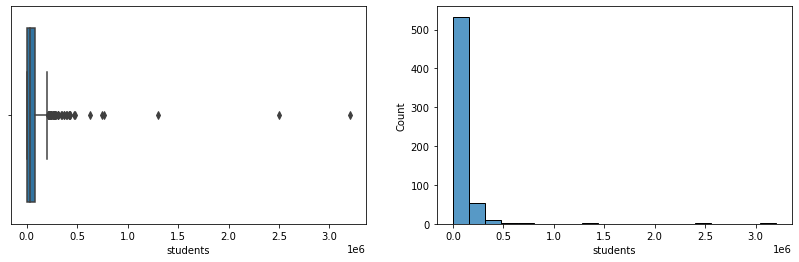

In [165]:
fig, axs = plt.subplots(1, 2,  figsize=(14, 4))
sns.boxplot(x='students', data=dfc, ax=axs[0])
sns.histplot(x='students', data=dfc, bins=20, kde=False, ax=axs[1])

In [174]:
dfc.head()

,name,institution,is_university,level,students,rating,first_review_on
0,machine learning,stanford university,1,mixed,222478,4.8,2015-08-07
1,indigenous canada,university of alberta,1,mixed,51000,4.8,2017-04-09
2,the science of well-being,yale university,1,mixed,2500000,4.9,2018-03-29
3,technical support fundamentals,google,0,beginner,280000,4.8,2018-01-16
4,become a cbrs certified professional installer...,google - spectrum sharing,0,mixed,210000,4.9,2019-06-07


In [168]:
dfc.at[0,'students'] = 222478   # Este registro fue corregido debido a que el número de estudiantes en la actualidad es muy 
                                # muy inferior al número registrado.

In [ ]:
fig, axs = plt.subplots(1, 2,  figsize=(14, 4))
sns.boxplot(x='students', data=dfe, ax=axs[0])
sns.histplot(x='students', data=dfe, bins=20, kde=False, ax=axs[1])

<AxesSubplot:xlabel='students', ylabel='Count'>

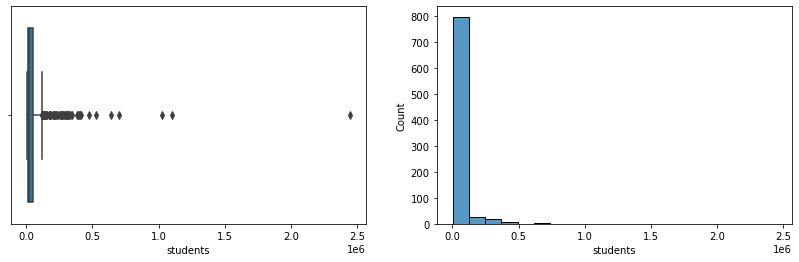

In [172]:
fig, axs = plt.subplots(1, 2,  figsize=(14, 4))
sns.boxplot(x='students', data=dfe, ax=axs[0])
sns.histplot(x='students', data=dfe, bins=20, kde=False, ax=axs[1])

In [173]:
dfe[dfe.students > 1000000]

,name,students,course_type,institution,is_university,level,subject,hours_per_week,weeks,total_effort,price
2,cs50's introduction to computer science,2442271,self-paced on your time,harvard university,1,beginner,computer science,12.0,12.0,144.0,90
28,ielts academic test preparation,1103777,self-paced on your time,the university of queensland,1,beginner,communication,7.5,8.0,60.0,99
30,toefl® test preparation: the insider’s guide,1022489,self-paced on your time,educational testing service,0,beginner,communication,3.0,6.0,18.0,49


####  Al resto de los outliers decidimos no tratarlos

In [224]:
dfc.to_csv('dataSets\\para_dashboard\\coursera.csv', index = False)